<a href="https://colab.research.google.com/github/daniellecd/portfolio/blob/master/Queda_de_idosos/Queda_idosos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão do quantitativo de quedas de idosos**




## **Instalação dos pacotes necessários**

In [ ]:
#Instalação dos pacotes necessárias
!pip install pystan
!pip install fbprophet

In [ ]:
# Importação das bibliotecas necessárias 
import pandas as pd
import numpy as np

import fbprophet
from fbprophet import Prophet

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

## **Importação dos dados**

In [ ]:
#Leitura do dataset e cinco primeiras linhas
df = pd.read_excel('/content/Quedas_Idosos_Prophet.xlsx')
df.head()

,Data,Quedas
0,2008-01-01,4745
1,2008-02-01,4266
2,2008-03-01,4794
3,2008-04-01,4752
4,2008-05-01,5233


In [ ]:
df.tail()

,Data,Quedas
139,2019-08-01,12144
140,2019-09-01,11175
141,2019-10-01,11334
142,2019-11-01,10868
143,2019-12-01,11051


In [ ]:
# Verificação dos tipos de dados
df.dtypes

Data      datetime64[ns]
Quedas             int64
dtype: object

In [ ]:
# Renomeando as colunas, conforme requisitado pela biblioteca Prophet, e visualização das cinco primeiras linhas
df.columns = ["ds","y"]
df.head()

,ds,y
0,2008-01-01,4745
1,2008-02-01,4266
2,2008-03-01,4794
3,2008-04-01,4752
4,2008-05-01,5233


In [ ]:
df.head()

,ds,y
0,2008-01-01,4745
1,2008-02-01,4266
2,2008-03-01,4794
3,2008-04-01,4752
4,2008-05-01,5233


## **Modelo Preditivo - Prophet**

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
# Ajuste do modelo
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model

In [ ]:
# Criando datas futuras para previsões em um dataframe
future = model.make_future_dataframe(periods = 24, freq='M')

In [ ]:
# Visualização das cinco últimas linhas - última da da previsão é Dezembro de 2021
future.tail()

,ds
163,2021-07-31
164,2021-08-31
165,2021-09-30
166,2021-10-31
167,2021-11-30


In [ ]:
# Previsão dos dados 
pred = model.predict(future)

In [ ]:
# Visualização dos dados gerados pelo modelo
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,4674.364282,4197.351989,4673.971785,4674.364282,4674.364282,-235.075036,-235.075036,-235.075036,-235.075036,-235.075036,-235.075036,0.0,0.0,0.0,4439.289246
1,2008-02-01,4736.453736,3683.461115,4150.677548,4736.453736,4736.453736,-812.984017,-812.984017,-812.984017,-812.984017,-812.984017,-812.984017,0.0,0.0,0.0,3923.469718
2,2008-03-01,4794.537419,4418.161552,4917.080569,4794.537419,4794.537419,-119.479488,-119.479488,-119.479488,-119.479488,-119.479488,-119.479488,0.0,0.0,0.0,4675.057931
3,2008-04-01,4856.626873,4265.762882,4761.021069,4856.626873,4856.626873,-356.740867,-356.740867,-356.740867,-356.740867,-356.740867,-356.740867,0.0,0.0,0.0,4499.886006
4,2008-05-01,4916.713442,5071.747681,5575.002363,4916.713442,4916.713442,422.492257,422.492257,422.492257,422.492257,422.492257,422.492257,0.0,0.0,0.0,5339.205698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2021-07-31,12770.167482,13307.439882,13864.694913,12656.330051,12859.001714,823.152267,823.152267,823.152267,823.152267,823.152267,823.152267,0.0,0.0,0.0,13593.319750
164,2021-08-31,12834.396059,12405.335188,12964.200092,12709.865833,12932.359968,-138.864781,-138.864781,-138.864781,-138.864781,-138.864781,-138.864781,0.0,0.0,0.0,12695.531278
165,2021-09-30,12896.552746,12545.127090,13108.489829,12765.479384,13002.389451,-50.739061,-50.739061,-50.739061,-50.739061,-50.739061,-50.739061,0.0,0.0,0.0,12845.813685
166,2021-10-31,12960.781322,12150.946344,12697.635565,12819.315836,13079.069208,-515.241435,-515.241435,-515.241435,-515.241435,-515.241435,-515.241435,0.0,0.0,0.0,12445.539888


In [ ]:
# Visulaização das cinco primeiras linhas dos dados ds (data), yhat (previsão do modelo), yhat_lower e yhta_uooer (valores previstos para os intervalos de incerteza)
pred[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2008-01-01,4439.289246,4197.351989,4673.971785
1,2008-02-01,3923.469718,3683.461115,4150.677548
2,2008-03-01,4675.057931,4418.161552,4917.080569
3,2008-04-01,4499.886006,4265.762882,4761.021069
4,2008-05-01,5339.205698,5071.747681,5575.002363


In [ ]:
# Visulaização das cinco últimas linhas dos dados ds (data), yhat (previsão do modelo), yhat_lower e yhta_uooer (valores previstos para os intervalos de incerteza)
pred[["ds","yhat","yhat_lower","yhat_upper"]].tail(11)

,ds,yhat,yhat_lower,yhat_upper
157,2021-01-31,11666.852431,11394.125767,11907.852304
158,2021-02-28,11842.822831,11565.145407,12080.248679
159,2021-03-31,12391.064176,12131.837173,12622.422010
160,2021-04-30,12887.178258,12605.245433,13153.402840
161,2021-05-31,12654.138078,12369.036428,12896.844304
162,2021-06-30,13771.172379,13509.562521,14041.479350
163,2021-07-31,13593.319750,13307.439882,13864.694913
164,2021-08-31,12695.531278,12405.335188,12964.200092
165,2021-09-30,12845.813685,12545.127090,13108.489829
166,2021-10-31,12445.539888,12150.946344,12697.635565


## **Análise gráfica do modelo de previsão**

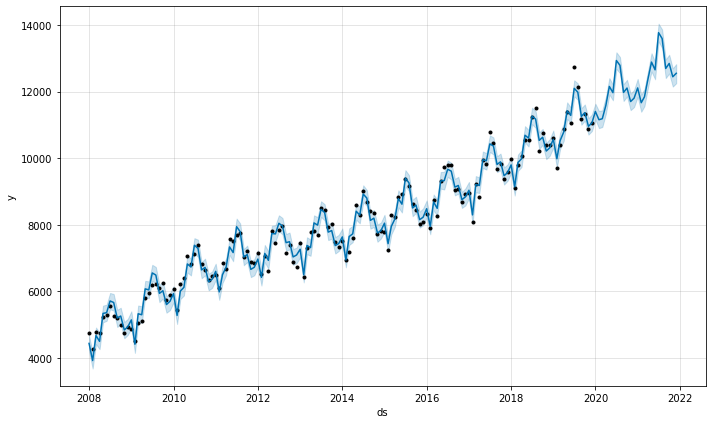

In [ ]:
#Visualização gráfica dos dados - Período de 2008 a 2021
ax = model.plot(pred);

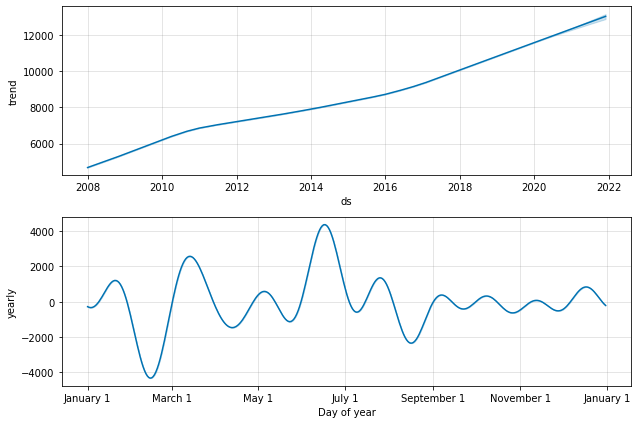

In [ ]:
#visualizacao de cada componente do modelo previsto. Trend é a tendências e yearly a sazonalidade
model.plot_components(pred);

Conforme observado nos gráficos acima, há uma tendência de crescimento no número de quedas que poderá ocorrer com os idosos, podendo afetar quase 140 mil pessoas ao longo do ano, ecom média de 12,7 mil quedas por mês e picos durante o período de inverno.